<a href="https://colab.research.google.com/github/EstherHansol/KTxAI/blob/main/dog_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2022-07-08 02:41:58--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 2607:f8b0:4023:c0d::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   108MB/s    in 0.6s    

2022-07-08 02:41:59 (108 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [2]:
# 기본 경로
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 고양이/개 이미지 경로
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_cats_dir)
print(train_dogs_dir)

# 테스트에 사용되는 고양이/개 이미지 경로
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_cats_dir)
print(validation_dogs_dir)

NameError: ignored

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:5])
print(train_dog_fnames[:5])

['cat.138.jpg', 'cat.7.jpg', 'cat.945.jpg', 'cat.405.jpg', 'cat.630.jpg']
['dog.268.jpg', 'dog.405.jpg', 'dog.579.jpg', 'dog.967.jpg', 'dog.170.jpg']


In [ ]:
print('Total training cat images :', len(os.listdir(train_cats_dir)))
print('Total training dog images :', len(os.listdir(train_dogs_dir)))

print('Total validation cat images :', len(os.listdir(validation_cats_dir)))
print('Total validation dog images :', len(os.listdir(validation_dogs_dir)))

Total training cat images : 1000
Total training dog images : 1000
Total validation cat images : 500
Total validation dog images : 500


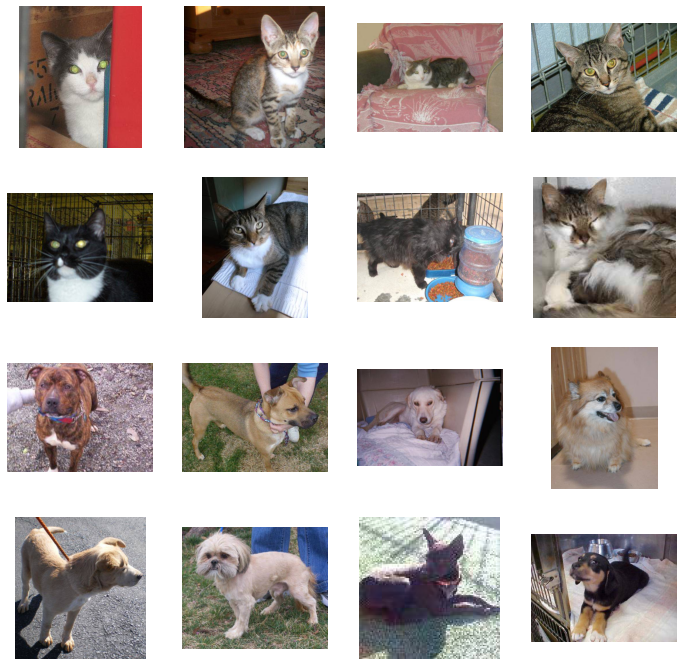

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]]

next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_steps=50,
                    verbose=2)

Epoch 1/100
100/100 - 54s - loss: 0.9307 - accuracy: 0.5235 - val_loss: 0.7042 - val_accuracy: 0.5050 - 54s/epoch - 539ms/step
Epoch 2/100
100/100 - 53s - loss: 0.6554 - accuracy: 0.6355 - val_loss: 0.5882 - val_accuracy: 0.6870 - 53s/epoch - 532ms/step
Epoch 3/100
100/100 - 54s - loss: 0.5882 - accuracy: 0.7155 - val_loss: 0.5875 - val_accuracy: 0.7110 - 54s/epoch - 539ms/step
Epoch 4/100
100/100 - 53s - loss: 0.5044 - accuracy: 0.7490 - val_loss: 0.5886 - val_accuracy: 0.7020 - 53s/epoch - 532ms/step
Epoch 5/100
100/100 - 53s - loss: 0.4059 - accuracy: 0.8145 - val_loss: 0.5659 - val_accuracy: 0.7350 - 53s/epoch - 526ms/step
Epoch 6/100
100/100 - 53s - loss: 0.3168 - accuracy: 0.8650 - val_loss: 0.6794 - val_accuracy: 0.7240 - 53s/epoch - 529ms/step
Epoch 7/100
100/100 - 53s - loss: 0.2357 - accuracy: 0.9005 - val_loss: 0.9165 - val_accuracy: 0.6980 - 53s/epoch - 528ms/step
Epoch 8/100
100/100 - 53s - loss: 0.1636 - accuracy: 0.9430 - val_loss: 0.8271 - val_accuracy: 0.7240 - 53s/epo

In [ ]:
 import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

In [ ]:
import pandas as pd
label = pd.read_csv('../input/dog-breed-identification/labels.csv')
sample_submission = pd.read_csv('../input/dog-breed-identification/sample_submission.csv')
label.head()

FileNotFoundError: ignored

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

setattr(tfds.image_classification.cats_vs_dogs, '_URL',"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete0W2STV/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [ ]:
print(raw_train)
print(raw_validation)
print(raw_test)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


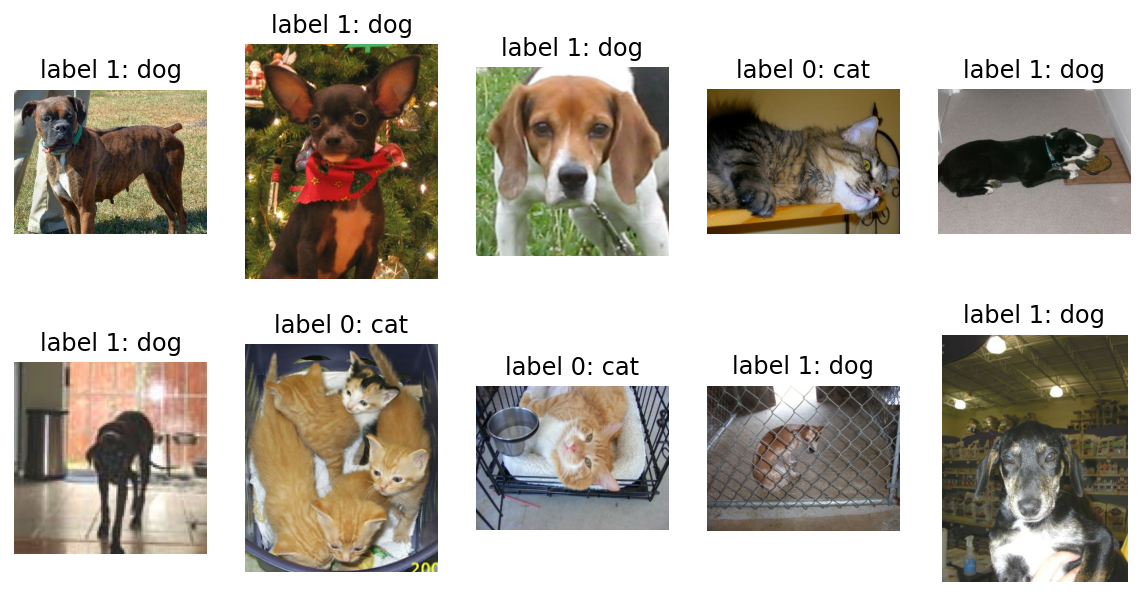

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(10, 5))

get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(raw_train.take(10)):  # 10개의 데이터 가져오기
    plt.subplot(2, 5, idx+1)
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [ ]:
IMG_SIZE = 160 # resize시킬 이미지의 크기

def format_example(image, label):
    image = tf.cast(image, tf.float32) 
    image = (image/127.5) - 1 # 픽셀값의 scale 수정
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label


In [ ]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

print(train)
print(validation)
print(test)

<MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
<MapDataset element_spec=(TensorSpec(shape=(160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


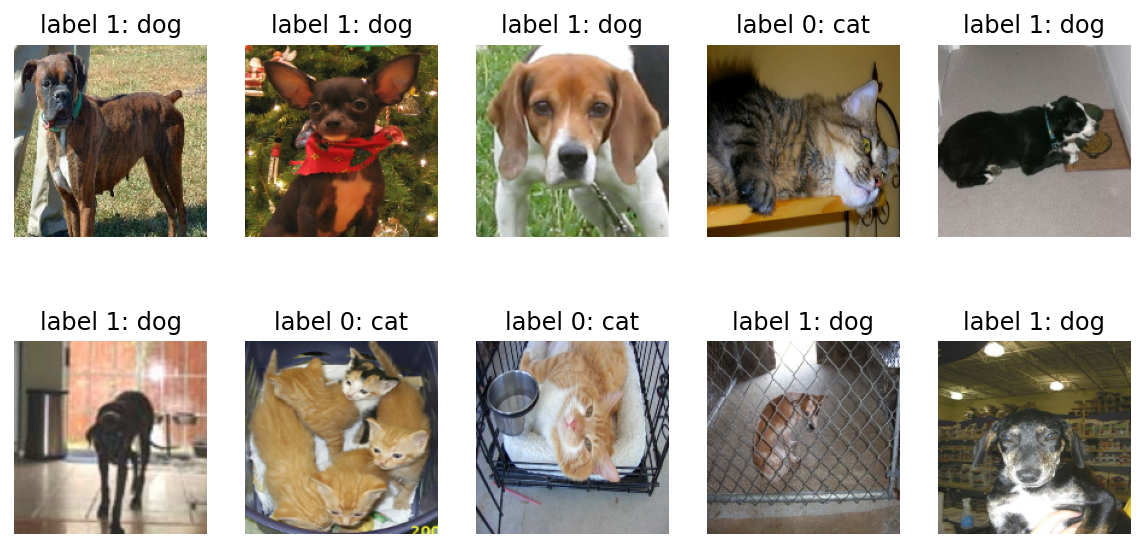

In [ ]:
plt.figure(figsize=(10, 5))


get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(train.take(10)):
    plt.subplot(2, 5, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 80, 80, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 64)       0

In [ ]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [ ]:
for image_batch, label_batch in train_batches.take(1):
    pass

image_batch.shape, label_batch.shape

(TensorShape([32, 160, 160, 3]), TensorShape([32]))

In [ ]:
validation_steps = 20
loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

20/20 [==============================] - 9s 392ms/step - loss: 0.7143 - accuracy: 0.4656
initial loss: 0.71
initial accuracy: 0.47


In [ ]:
EPOCHS = 10
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/10
582/582 [==============================] - 600s 1s/step - loss: 0.6063 - accuracy: 0.6668 - val_loss: 0.5426 - val_accuracy: 0.7343
Epoch 2/10
582/582 [==============================] - 582s 997ms/step - loss: 0.4904 - accuracy: 0.7631 - val_loss: 0.5560 - val_accuracy: 0.7300
Epoch 3/10
582/582 [==============================] - 583s 998ms/step - loss: 0.4232 - accuracy: 0.8041 - val_loss: 0.5605 - val_accuracy: 0.7317
Epoch 4/10
582/582 [==============================] - 619s 1s/step - loss: 0.3657 - accuracy: 0.8389 - val_loss: 0.4810 - val_accuracy: 0.7893
Epoch 5/10
582/582 [==============================] - 597s 1s/step - loss: 0.3132 - accuracy: 0.8657 - val_loss: 0.5051 - val_accuracy: 0.7850
Epoch 6/10
582/582 [==============================] - 589s 1s/step - loss: 0.2587 - accuracy: 0.8939 - val_loss: 0.5049 - val_accuracy: 0.7893
Epoch 7/10
582/582 [==============================] - 593s 1s/step - loss: 0.2091 - accuracy: 0.9175 - val_loss: 0.5060 - val_accuracy: 

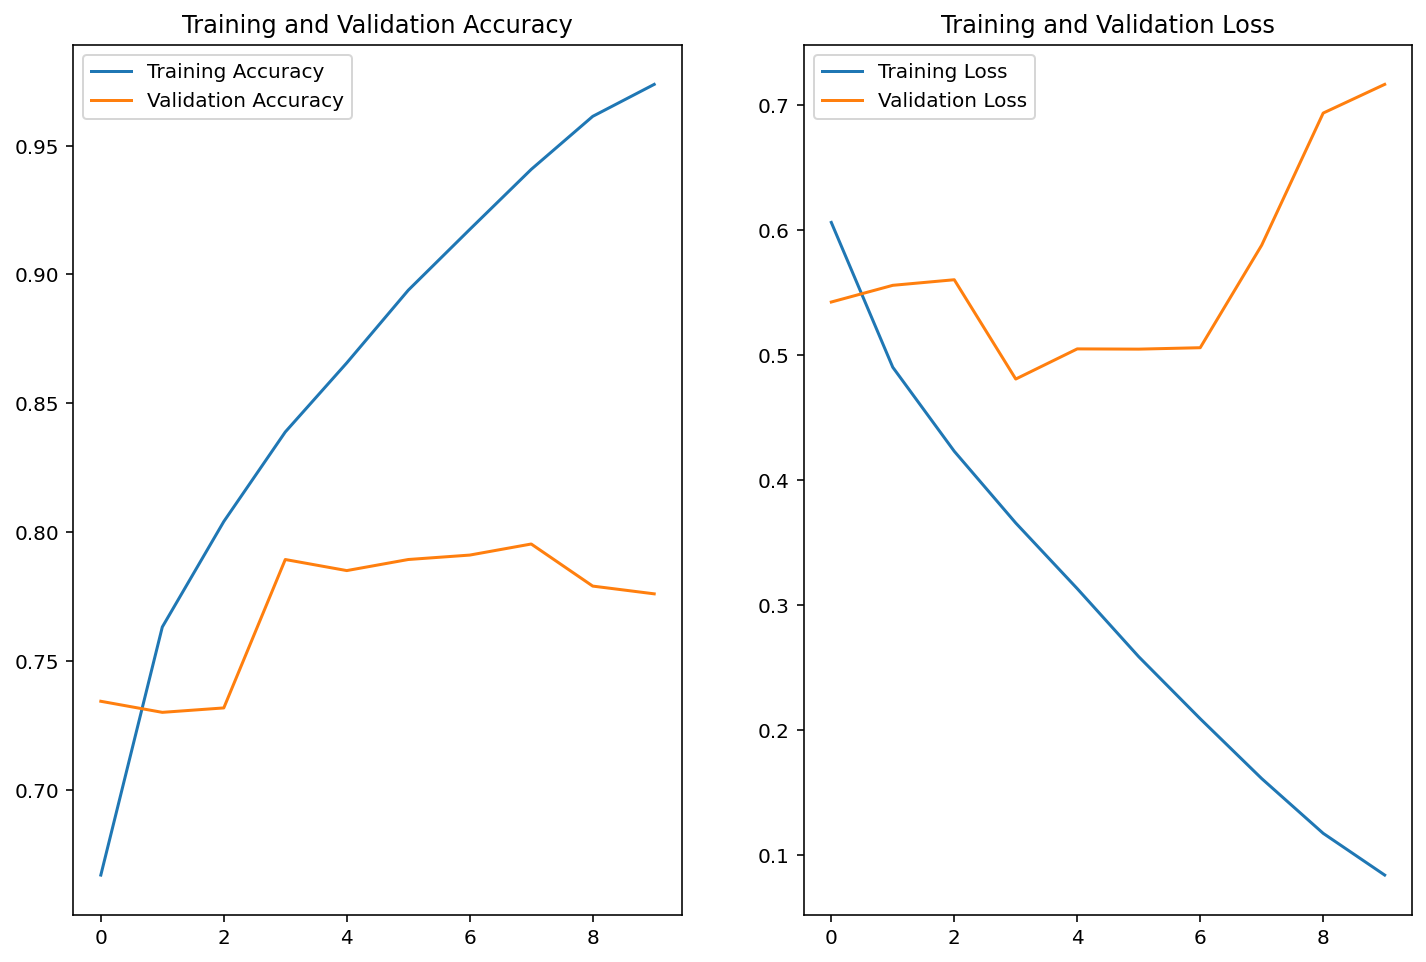

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    pass

predictions

array([[9.99994278e-01, 5.76707862e-06],
       [9.65919614e-01, 3.40804011e-02],
       [6.60234317e-02, 9.33976591e-01],
       [9.99983311e-01, 1.67479957e-05],
       [9.95809197e-01, 4.19079047e-03],
       [6.97054088e-01, 3.02945882e-01],
       [9.07959417e-02, 9.09204125e-01],
       [9.99986172e-01, 1.37807965e-05],
       [4.47466880e-01, 5.52533150e-01],
       [3.82919312e-02, 9.61708009e-01],
       [1.68319996e-02, 9.83168066e-01],
       [9.99994159e-01, 5.80477035e-06],
       [9.98045921e-01, 1.95411616e-03],
       [4.38514573e-04, 9.99561489e-01],
       [9.99176323e-01, 8.23680428e-04],
       [9.99687552e-01, 3.12502903e-04],
       [8.29115212e-01, 1.70884743e-01],
       [4.89425147e-04, 9.99510527e-01],
       [9.68323410e-01, 3.16765308e-02],
       [9.96978760e-01, 3.02131753e-03],
       [9.13435519e-01, 8.65644813e-02],
       [8.17556918e-01, 1.82443112e-01],
       [9.99990821e-01, 9.21824721e-06],
       [9.94939446e-01, 5.06062061e-03],
       [9.858770

In [ ]:
import numpy as np

predictions = np.argmax(predictions, axis=1)
predictions

In [ ]:
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred :{prediction}\n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color': 'red'})
    else:
        plt.title(title, fontdict={'color': 'blue'})
    plt.axis('off')

In [3]:
count = 0   # 정답을 맞춘 개수
for image, label, prediction in zip(images, labels, predictions):
    correct = label == prediction
    if correct:
        count = count + 1

print(count / 32 * 100)

NameError: ignored

In [ ]:
import numpy as np
import cv2
from time import sleep

# 메인 함수
def main():
    image = cv2.imread('./test1.png') # 파일 읽어들이기

    # BGR로 색추출
    bgrLower = np.array([102, 255, 255])    # 추출할 색의 하한
    bgrUpper = np.array([102, 255, 255])    # 추출할 색의 상한
    bgrResult = bgrExtraction(image, bgrLower, bgrUpper)
    cv2.imshow('BGR_test1', bgrResult)
    sleep(1)

    # HSV로 색추출
    hsvLower = np.array([30, 153, 255])    # 추출할 색의 하한
    hsvUpper = np.array([30, 153, 255])    # 추출할 색의 상한
    hsvResult = hsvExtraction(image, hsvLower, hsvUpper)
    cv2.imshow('HSV_test1', hsvResult)
    sleep(1)

    while True:
        # 키 입력을 1ms기다리고, key가「q」이면 break
        key = cv2.waitKey(1)&0xff
        if key == ord('q'):
            break

    cv2.destroyAllWindows()


# BGR로 특정 색을 추출하는 함수
def bgrExtraction(image, bgrLower, bgrUpper):
    img_mask = cv2.inRange(image, bgrLower, bgrUpper) 
    result = cv2.bitwise_and(image, image, mask=img_mask) 
    return result

# HSV로 특정 색을 추출하는 함수
def hsvExtraction(image, hsvLower, hsvUpper):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 
    hsv_mask = cv2.inRange(hsv, hsvLower, hsvUpper) 
    result = cv2.bitwise_and(image, image, mask=hsv_mask)
    return result


if __name__ == '__main__':
    main()